In [3]:
import pandas as pd


unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None,names=unames, encoding='latin-1')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, encoding='latin-1')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, encoding='latin-1')




In [4]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
data_user_rating = pd.merge(users, ratings, how = 'inner', on = 'user_id')

# users.info()
data_user_rating


,user_id,gender,age,occupation,zip,movie_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [8]:
data = pd.merge(data_user_rating, movies, how = 'inner', on = 'movie_id')
data.to_csv("Combined_Data",index = False)

In [9]:
data = pd.read_csv('Combined_Data')
data = data.dropna(axis=0)

In [10]:
import h5py
store = pd.HDFStore('store.h5')
print(store)
store['data'] = data

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5



In [11]:
store['data']

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [12]:
# How many movies have an average rating over 4.5 overall?
movies_avg = pd.pivot_table(data, index = ['title'], values = ['rating'])
movies_avg_new = movies_avg[movies_avg['rating'] >= 4.5]
len(movies_avg_new)
# movies_avg_new

29

In [13]:
# How many movies have an average rating over 4.5 among men? How about women?
# movies_avg_gender = data.pivot_table('rating', rows = 'title', cols = 'gender', aggfunc='mean')
# movies_avg_gender

movies_avg_gender = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
movies_avg_gender

movies_avg_gender.columns.name = None

movies_avg_gender = movies_avg_gender.reset_index() 

movies_avg_gender_f = movies_avg_gender[['title', 'F']]
female = movies_avg_gender_f[movies_avg_gender_f['F'] >= 4.5]
female

movies_avg_gender_m = movies_avg_gender[['title', 'M']]
male = movies_avg_gender_m[movies_avg_gender_m['M'] >= 4.5]
male

,title,M
173,Angela (1995),5.000000
199,"Apple, The (Sib) (1998)",4.600000
249,"Baby, The (1973)",5.000000
342,"Bells, The (1926)",5.000000
583,"Callejón de los milagros, El (1995)",4.500000
842,Dangerous Game (1993),5.000000
996,Dry Cleaning (Nettoyage à sec) (1997),4.500000
1203,Follow the Bitch (1998),5.000000
1208,For All Mankind (1989),4.583333
1297,"Gate of Heavenly Peace, The (1995)",5.000000


In [14]:
# How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
age_gender = data[['title', 'gender', 'age', 'rating']]
# age_gender = age_gender[age_gender[age]]
age_gender = age_gender[age_gender['age'] > 30]
age_gender_pt = age_gender.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'median')
age_gender_pt.columns.name = None
age_gender_df = age_gender_pt.reset_index() 
female_30 = age_gender_df[['title', 'F']]
female_30 = female_30[female_30['F'] >= 4.5]
female_30


male_30 = age_gender_df[['title', 'M']]
male_30 = male_30[male_30['M'] >= 4.5]
male_30
len(female_30)

187

In [15]:
age_gender_pt

,F,M
title,,
"$1,000,000 Duck (1971)",3.0,2.5
'Night Mother (1986),3.0,3.0
'Til There Was You (1997),3.0,2.0
"'burbs, The (1989)",3.0,3.0
...And Justice for All (1979),4.0,4.0
...,...,...
"Zed & Two Noughts, A (1985)",4.0,4.0
Zero Effect (1998),4.0,4.0
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.5


In [17]:
import numpy as np
d = pd.pivot_table(data, values = 'rating', index = ['title'], columns = ['gender','age'], aggfunc = np.mean).reset_index()


In [18]:
f = d[~d.isna().any(axis=1)][['title','F']].copy()
f['Avg'] = (f['F'][1] + f['F'][18] + f['F'][25] + f['F'][35] + f['F'][45] + f['F'][50] +  f['F'][56])/7
f = f.sort_values(by = ['Avg'],ascending = False).reset_index()
f

gender index                                        title         F            \
age                                                               1        18   
0       1397  Grand Illusion (Grande illusion, La) (1937)  4.666667  5.000000   
1        713                        Close Shave, A (1995)  4.250000  4.611111   
2       2901                      Schindler's List (1993)  4.533333  4.431034   
3       1303                          General, The (1927)  4.000000  5.000000   
4       3675                   Wrong Trousers, The (1993)  4.214286  4.693878   
...      ...                                          ...       ...       ...   
1156    1603                       Howard the Duck (1986)  1.000000  2.086957   
1157     577                             Cabin Boy (1994)  2.000000  2.100000   
1158    3114               Speed 2: Cruise Control (1997)  2.000000  1.818182   
1159     238                         Avengers, The (1998)  1.000000  1.642857   
1160     308                     Battlefield Earth (2000)  1.500000  1.625000   

gender                                                         Avg  
age           25        35        45        50        56            
0       4.250000  4.416667  4.800000  4.700000  5.000000  4.690476  
1       4.793651  4.604651  4.500000  4.545455  5.000000  4.614981  
2       4.481308  4.627273  4.704225  4.765957  4.714286  4.608202  
3       5.000000  4.200000  4.250000  4.800000  5.000000  4.607143  
4       4.650602  4.448276  4.733333  4.571429  4.800000  4.587400  
...          ...       ...       ...       ...       ...       ...  
1156    2.074074  2.000000  2.500000  3.000000  2.000000  2.094433  
1157    2.250000  1.857143  2.000000  1.500000  2.000000  1.958163  
1158    1.750000  2.357143  1.833333  2.000000  1.500000  1.894094  
1159    2.062500  2.176471  1.600000  2.000000  2.000000  1.783118  
1160    1.421053  1.700000  2.000000  2.000000  1.000000  1.606579  

[1161 rows x 10 columns]

In [19]:
m = d[~d.isna().any(axis=1)][['title','M']].copy()
m['Avg'] = (m['M'][1] + m['M'][18] + m['M'][25] + m['M'][35] + m['M'][45] + m['M'][50] +  m['M'][56])/7
m = m.sort_values(by = ['Avg'],ascending = False).reset_index()

In [20]:
set(f['title'][:25])&set(m['title'][:25])

{'Bicycle Thief, The (Ladri di biciclette) (1948)',
 'Close Shave, A (1995)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Rear Window (1954)',
 "Schindler's List (1993)",
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
 'Shawshank Redemption, The (1994)',
 'Third Man, The (1949)',
 'Usual Suspects, The (1995)',
 'Wrong Trousers, The (1993)'}

In [21]:
occupation_dict = {0:  "other" , 1:  "academic/educator", 2:  "artist", 3:  "clerical/admin", 4:  "college/grad student", 5:  "customer service", 6:  "doctor/health care", 7:  "executive/managerial", 8:  "farmer", 9:  "homemaker", 10:  "K-12 student", 11:  "lawyer", 12:  "programmer", 13:  "retired" , 14:  "sales/marketing", 15:  "scientist" , 16:  "self-employed", 17:  "technician/engineer" , 18:  "tradesman/craftsman", 19:  "unemployed", 20:  "writer"}
data_occ = data.copy()
data_occ['occupation'] = data['occupation'].map(occupation_dict)
data_occ
table = pd.pivot_table(data_occ, index=['occupation'], values= ['age', 'rating'], aggfunc={'age':'mean', 'rating': 'count'}).sort_values(by = ['rating'])
table

,age,rating
occupation,,
farmer,40.762380,2706
homemaker,33.638960,11345
tradesman/craftsman,32.269237,12086
retired,52.476807,13754
unemployed,23.549181,14904
lawyer,33.071925,20563
customer service,29.430984,21850
scientist,29.642848,22951
K-12 student,4.213568,23290


# Conjecture 1 - Older people are hard to please (>45)

In [22]:
data['Rating1'] = data['rating']

In [23]:
age_rating = pd.pivot_table(data, values = 'Rating1', index = ['age','rating'], aggfunc ='count').reset_index()
age_rating['Percent'] = 0
for i in age_rating.index:
    sum1 = age_rating.loc[age_rating['age']==age_rating['age'].iloc[i]]['Rating1'].sum()
    age_rating['Percent'].iloc[i] = (age_rating['Rating1'].iloc[i]/sum1)*100

In [24]:
age_rating.loc[age_rating['rating']>=4].groupby(by='age').sum()['Percent']

age
1     57.366506
18    54.920561
25    56.263588
35    58.638814
45    59.158466
50    62.193406
56    64.633832
Name: Percent, dtype: float64

From the data we observe that 64% of older people gave rating of 4 and 5. Hence, we can say that older people are easy to please and conjecture made is false 

# Conjecture 2 - Females over 55 of age give higher rating.¶

In [25]:
age_gender_rating = pd.pivot_table(data, values = 'Rating1', index = ['age','gender','rating'], aggfunc ='count').reset_index()
age_gender_rating['Percent'] = 0
for i in age_gender_rating.index:
    sum1 = age_gender_rating.loc[(age_gender_rating['age']==age_gender_rating['age'].iloc[i]) & (age_gender_rating['gender']==age_gender_rating['gender'].iloc[i])]['Rating1'].sum()
    age_gender_rating['Percent'].iloc[i] = (age_gender_rating['Rating1'].iloc[i]/sum1)*100

/Users/gaurijare/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
age_gender_rating.loc[age_gender_rating['rating']>=4].groupby(by=['age','gender']).sum()['Percent']

age  gender
1    F         60.462218
     M         55.880113
18   F         52.633896
     M         55.672693
25   F         58.612875
     M         55.558222
35   F         60.204556
     M         58.120778
45   F         60.875156
     M         58.463115
50   F         65.517050
     M         61.090288
56   F         70.638113
     M         62.766641
Name: Percent, dtype: float64

From the output data, we can see that over 70% of older female's are easy to please.¶

# Conjecture 3 - Retired people or people from customer service are easy to please

In [28]:
age_occupation_rating = pd.pivot_table(data, values = 'Rating1', index = ['age','occupation','rating'], aggfunc ='count').reset_index()
age_occupation_rating['Percent'] = 0
for i in age_occupation_rating.index:
    sum1 = age_occupation_rating.loc[(age_occupation_rating['age']==age_occupation_rating['age'].iloc[i]) & (age_occupation_rating['occupation']==age_occupation_rating['occupation'].iloc[i])]['Rating1'].sum()
    age_occupation_rating['Percent'].iloc[i] = (age_occupation_rating['Rating1'].iloc[i]/sum1)*100
    

In [29]:
d3 = age_occupation_rating.loc[age_occupation_rating['rating']>=4].groupby(by=['age','occupation']).sum().reset_index()
d3.loc[d3['Percent']>70]

,age,occupation,rating,Rating1,Percent
9,1,13,9,17,73.913043
11,1,17,9,43,72.881356
27,18,15,9,1800,71.513707
103,50,9,9,497,72.767204
107,50,14,9,1231,72.241784
108,50,15,9,732,79.565217
110,50,17,9,3140,70.167598
112,50,19,9,257,74.063401
114,56,0,9,2108,70.785762
116,56,2,9,1046,73.610134


Conjecture 3 is true, as 75-85% of customer service people and retired people gave positive ratings

In [30]:
data['title'].unique()

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

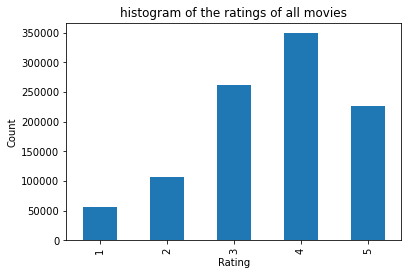

In [31]:
# Plot a histogram of the ratings of all movies.
import matplotlib.pyplot as plt
rating = data.groupby('rating').size()
# rating = data.pivot_table('rating',index='title',aggfunc='count')
rating.plot(kind = 'bar')
plt.title('histogram of the ratings of all movies')
plt.ylabel('Count')
plt.xlabel('Rating')
rating
plt.rcParams["figure.figsize"] = (8, 6 )
plt.show()

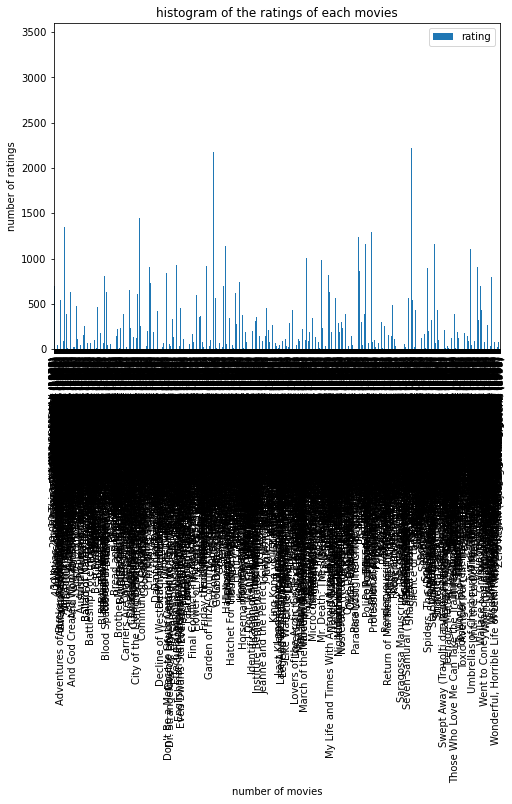

In [32]:
# Plot a histogram of the number of ratings each movie recieved.
rating_title = data.pivot_table('rating',index='title',aggfunc='count')
rating_title
rating_title.plot(kind='bar')
plt.title('histogram of the ratings of each movies')
plt.xlabel('number of movies')
plt.ylabel('number of ratings')
plt.rcParams["figure.figsize"] = (1000, 10)
plt.show()

In [33]:
rating_title = data.pivot_table('rating',index='title',aggfunc='count')
rating_title

,rating
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
"Zed & Two Noughts, A (1985)",29
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2


In [36]:
# !pip install jupyter-dash
# !pip install "jupyterlab>=3" "ipywidgets>=7.6"

import plotly.express as px
rating_title= rating_title.reset_index()
fig = px.bar(rating_title, x = 'title', y="rating")
fig.show()

In [37]:
rating_mean=data.pivot_table('rating',index='title',aggfunc='mean')
# histogram of the average rating for each movie.
import plotly.express as px
rating_mean= rating_mean.reset_index()
fig = px.bar(rating_mean, x = 'title', y="rating")
fig.show()

In [38]:
rating_count=data.groupby('title').size() 
rating_mean=data.pivot_table('rating',index='title',aggfunc='mean')

rating_count_100 = rating_count.index[rating_count > 100]
avg_ratings_100 = rating_mean.loc[rating_count_100]

# Plot a histogram of the average rating for movies which are rated more than 100 times.
import plotly.express as px
avg_ratings_100= avg_ratings_100.reset_index()
fig = px.bar(avg_ratings_100, x = 'title', y="rating")
fig.show()

In [39]:
# Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?
avg_ratings_morethan100 = avg_ratings_100.copy() 
avg_ratings_morethan100

# rating_count=data.groupby('title').size() 
# rating_mean=data.pivot_table('rating',index='title',aggfunc='mean')

rating_count_less100 = rating_count.index[rating_count < 100]
avg_ratings_lessthan100 = rating_mean.loc[rating_count_less100] 
avg_ratings_lessthan100.sort_values(by = ['rating'], ascending=False)
avg_ratings_100.sort_values(by = ['rating'], ascending=False)

,title,rating
1595,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510
1615,"Shawshank Redemption, The (1994)",4.554558
735,"Godfather, The (1972)",4.524966
381,"Close Shave, A (1995)",4.520548
1903,"Usual Suspects, The (1995)",4.517106
...,...,...
144,Baby Geniuses (1999),1.701220
1409,Police Academy 6: City Under Siege (1989),1.657718
29,Aces: Iron Eagle III (1992),1.640000
176,Battlefield Earth (2000),1.611111


In [45]:
gender_occupation_rating = pd.pivot_table(data, values = 'Rating1', index = ['gender','occupation','rating'], aggfunc ='count').reset_index()
gender_occupation_rating['Percent'] = 0
for i in gender_occupation_rating.index:
    sum1 = gender_occupation_rating.loc[(gender_occupation_rating['gender']==gender_occupation_rating['gender'].iloc[i]) & (gender_occupation_rating['occupation']==gender_occupation_rating['occupation'].iloc[i])]['Rating1'].sum()
    gender_occupation_rating['Percent'].iloc[i] = (gender_occupation_rating['Rating1'].iloc[i]/sum1)*100

/Users/gaurijare/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'Male')

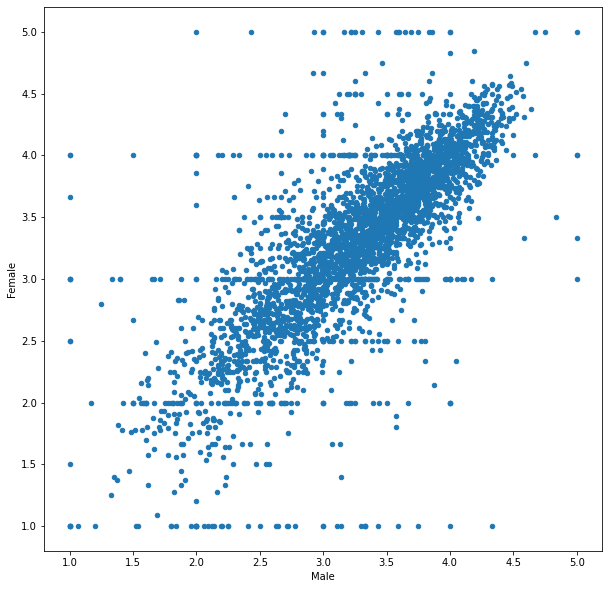

In [49]:
# Make a scatter plot of men versus women and their mean rating for every movie.

men_female_avg = data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc='mean').reset_index()
men_female_avg.plot.scatter(x = 'M', y = 'F', figsize = (10, 10))
# plt.title('men versus women and their mean rating for every movie')
plt.ylabel('Female')
plt.xlabel('Male')

In [54]:
mean_rating_200['M'].corr(mean_rating_200['F'])

0.9183613857026661

In [55]:
gender_correlation = pd.pivot_table(data, values = 'rating', index = ['title'], columns = ['gender'], aggfunc = 'mean').reset_index()
gender_correlation

gender,title,F,M
0,"$1,000,000 Duck (1971)",3.375000,2.761905
1,'Night Mother (1986),3.388889,3.352941
2,'Til There Was You (1997),2.675676,2.733333
3,"'burbs, The (1989)",2.793478,2.962085
4,...And Justice for All (1979),3.828571,3.689024
...,...,...,...
3701,"Zed & Two Noughts, A (1985)",3.500000,3.380952
3702,Zero Effect (1998),3.864407,3.723140
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000
3704,Zeus and Roxanne (1997),2.777778,2.357143


In [56]:
gender_correlation['M'].corr(gender_correlation['F'])


0.7631898908583273

In [58]:
correlation_age = pd.pivot_table(data, values = 'rating', index = ['title','age'], columns = ['gender'], aggfunc = 'mean').reset_index()
correlation_age

gender,title,age,F,M
0,"$1,000,000 Duck (1971)",18,5.000000,2.600000
1,"$1,000,000 Duck (1971)",25,3.333333,3.000000
2,"$1,000,000 Duck (1971)",35,3.222222,3.000000
3,"$1,000,000 Duck (1971)",45,NaN,2.000000
4,"$1,000,000 Duck (1971)",50,3.333333,1.000000
...,...,...,...,...
22452,eXistenZ (1999),25,3.181818,3.246667
22453,eXistenZ (1999),35,2.846154,3.475410
22454,eXistenZ (1999),45,3.666667,3.095238
22455,eXistenZ (1999),50,3.500000,3.250000


# for the age group of 25 we can predict that if other gender will rate that movie as same. As there is a nearly correlation of 0.7.

In [59]:
for i in correlation_age['age'].unique():
 
    print(i, correlation_age.loc[correlation_age['age']==i]['F'].corr(correlation_age.loc[correlation_age['age']==i]['M']))

18 0.5756217429956529
25 0.6862928565053231
35 0.5993980821580611
45 0.5689876364372755
50 0.5369477580121141
1 0.3478844949483001
56 0.4130941228189281


# Given that the genre of the movie is 'Sci-Fi', we can predict the ratings given by one gender to predict the rating given by the other gender

In [60]:
scifi = data.loc[data['genres'].str.contains("Sci-Fi")]
correleation_scifi = pd.pivot_table(scifi, values = 'rating', index = ['title'], columns = ['gender'], aggfunc = 'mean').reset_index()
correleation_scifi.corr(method='pearson')

gender,F,M
gender,,
F,1.000000,0.844085
M,0.844085,1.000000


# Given that we know the genre of the movie is Sci-Fi and the age group of the user is 18 or 35, we can predict the the ratings given by one gender to predict the rating given by the other gender.¶

In [61]:
scifi = data.loc[data['genres'].str.contains("Sci-Fi")]
correleation_scifi = pd.pivot_table(scifi, values = 'rating', index = ['title','age'], columns = ['gender'], aggfunc = 'mean').reset_index()

In [62]:
for i in correleation_scifi['age'].unique():
 
    print(i, correleation_scifi.loc[correleation_scifi['age']==i]['F'].corr(correleation_scifi.loc[correleation_scifi['age']==i]['M']))

1 0.5288552769069775
18 0.7224452343120461
25 0.596067690653908
35 0.7230706931290808
45 0.6234697740113849
50 0.4872632107586209
56 0.38534609912978063


# Which age group tends to like more drama

In [63]:
genres = data['genres']
all_genres = [string.split('|') for string in genres]
drama =  [ 'Drama' in genres for genres in all_genres]
drama_series = pd.DataFrame(drama, index=data.index)
data['drama'] = drama_series

drama_data = data.loc[data['drama'] == True]


In [64]:
drama_data

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,Rating1,drama
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,5,True
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,5,True
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,4,True
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,4,True
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1000198,5334,F,56,13,46140,127,1,960795494,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama,1,True
1000199,5334,F,56,13,46140,3382,5,960796159,Song of Freedom (1936),Drama,5,True
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama,3,True
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama,1,True


In [65]:
num_ratings_drama_by_title = drama_data.groupby('title').size()


In [66]:
drama_100_titles = num_ratings_drama_by_title.index[num_ratings_drama_by_title > 100]

In [67]:
drama_mean_ratings = drama_data.pivot_table('rating',index = ['age'],columns = 'gender',aggfunc = 'count')
drama_mean_ratings.rename(index={1:'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
drama_mean_ratings

gender,F,M
age,,
Under 18,2671,4812
18-24,15977,42127
25-34,37052,101643
35-44,19239,52351
45-49,10287,21854
50-55,8237,21010
56+,4690,12579


Text(0, 0.5, 'Count')

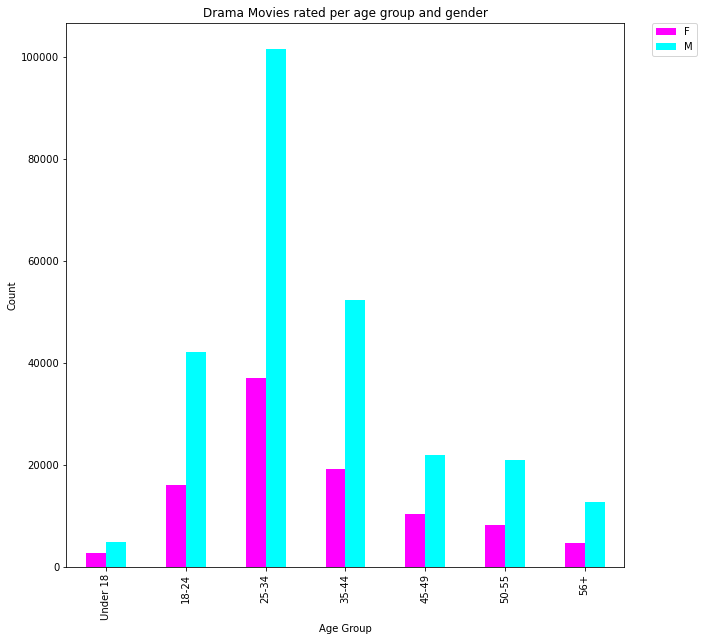

In [70]:
drama_mean_ratings.plot(kind='bar', color=['magenta','cyan'], figsize = (10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Drama Movies rated per age group and gender')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Sci-Fi and techies

In [73]:
occupation_dict = {0:  "other" , 1:  "academic/educator", 2:  "artist", 3:  "clerical/admin", 4:  "college/grad student", 5:  "customer service", 6:  "doctor/health care", 7:  "executive/managerial", 8:  "farmer", 9:  "homemaker", 10:  "K-12 student", 11:  "lawyer", 12:  "programmer", 13:  "retired" , 14:  "sales/marketing", 15:  "scientist" , 16:  "self-employed", 17:  "technician/engineer" , 18:  "tradesman/craftsman", 19:  "unemployed", 20:  "writer"}
data_occ = data.copy()
data_occ['occupation'] = data['occupation'].map(occupation_dict)
data_occ.columns

Index(['user_id', 'gender', 'age', 'occupation', 'zip', 'movie_id', 'rating',
       'timestamp', 'title', 'genres', 'Rating1', 'drama', 'scifi'],
      dtype='object')

In [74]:
scifi_genres = data_occ['genres']
all_scifi_genres = [string.split('|') for string in scifi_genres]
scifi =  [ 'Sci-Fi' in genres for genres in all_scifi_genres]
scifi_series = pd.DataFrame(scifi, index=data.index)
data['scifi'] = scifi_series

scifi_data = data_occ.loc[data_occ['scifi'] == True]

In [75]:
scifi_data

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,Rating1,drama,scifi
23270,1,F,1,K-12 student,48067,1270,5,978300055,Back to the Future (1985),Comedy|Sci-Fi,5,False,True
23271,3,M,25,scientist,55117,1270,3,978298231,Back to the Future (1985),Comedy|Sci-Fi,3,False,True
23272,7,M,35,academic/educator,06810,1270,4,978234581,Back to the Future (1985),Comedy|Sci-Fi,4,False,True
23273,10,F,35,academic/educator,95370,1270,4,978225735,Back to the Future (1985),Comedy|Sci-Fi,4,False,True
23274,17,M,50,academic/educator,95350,1270,5,978158536,Back to the Future (1985),Comedy|Sci-Fi,5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999871,3476,M,50,other,44126,3666,1,968952003,Retro Puppetmaster (1999),Horror|Sci-Fi|Thriller,1,False,True
999872,3660,M,35,executive/managerial,15137,3666,2,966433930,Retro Puppetmaster (1999),Horror|Sci-Fi|Thriller,2,False,True
999873,4979,M,35,artist,55423,3666,1,989201305,Retro Puppetmaster (1999),Horror|Sci-Fi|Thriller,1,False,True
1000076,3338,M,45,self-employed,08053,3779,3,967828156,Project Moon Base (1953),Sci-Fi,3,False,True


In [76]:
techie_data = scifi_data.loc[(scifi_data['occupation']=='scientist')|(scifi_data['occupation']=='programmer')|(scifi_data['occupation']=='technician/engineer')]
techie_data

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,Rating1,drama,scifi
23271,3,M,25,scientist,55117,1270,3,978298231,Back to the Future (1985),Comedy|Sci-Fi,3,False,True
23276,22,M,18,scientist,53706,1270,4,978152904,Back to the Future (1985),Comedy|Sci-Fi,4,False,True
23285,44,M,45,technician/engineer,98052,1270,5,978019549,Back to the Future (1985),Comedy|Sci-Fi,5,False,True
23291,65,M,35,programmer,55803,1270,5,977888740,Back to the Future (1985),Comedy|Sci-Fi,5,False,True
23295,82,M,25,technician/engineer,48380,1270,5,977762272,Back to the Future (1985),Comedy|Sci-Fi,5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998623,1941,M,35,technician/engineer,94550,3574,1,974851653,Carnosaur 3: Primal Species (1996),Horror|Sci-Fi,1,False,True
998633,6036,F,25,scientist,32603,3574,1,956755196,Carnosaur 3: Primal Species (1996),Horror|Sci-Fi,1,False,True
999293,3615,M,25,technician/engineer,76028,3486,4,966602404,Devil Girl From Mars (1954),Sci-Fi,4,False,True
999295,5433,F,35,technician/engineer,45014,3486,1,960243898,Devil Girl From Mars (1954),Sci-Fi,1,False,True


In [77]:
scifi_mean_ratings = scifi_data.pivot_table('rating',index = ['occupation'],columns = 'gender',aggfunc = 'count')
scifi_mean_ratings

gender,F,M
occupation,,
K-12 student,821,3111
academic/educator,3102,8693
artist,1563,5547
clerical/admin,1638,2384
college/grad student,3624,16728
customer service,504,3285
doctor/health care,1952,3194
executive/managerial,2265,14051
farmer,98,452


Text(0, 0.5, 'Count')

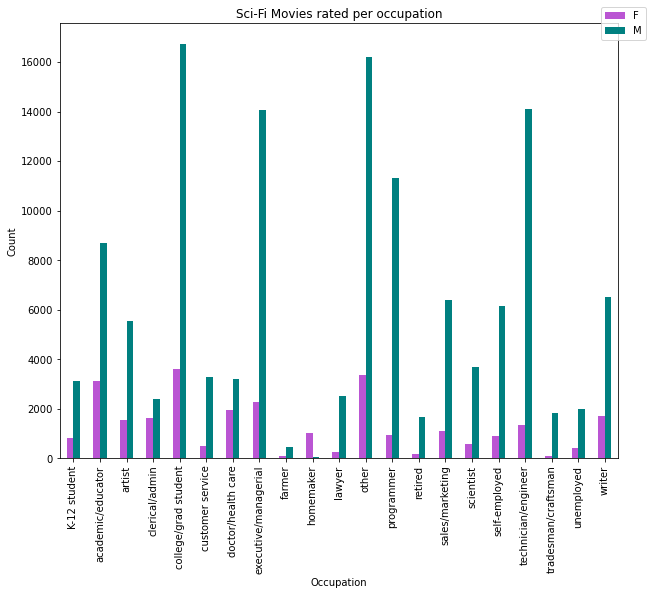

In [79]:
scifi_mean_ratings.plot(kind='bar', color=['mediumorchid','teal'], figsize = (10, 8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=7, borderaxespad=0.)
plt.title('Sci-Fi Movies rated per occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')